In [38]:
import os
import json
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
# ! Specify result dir
RESULT_DIR = 'exp_output/2023-11-24-02_41_54'
DATASET = 'office_home'
SELECT_GPT4V_SUCCESS = True
SELECT_LLAVA_SUCCESS = True

In [39]:
def show_img(img_path):
    if os.path.exists(img_path):
        img = imread(img_path)

        fig = plt.figure()
        fig.set_dpi(100)

        plt.imshow(img)
        plt.axis('off')
        plt.show()


def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data


def read_and_reformat_jsonl(file_path):
    reformatted_data = {}
    with open(file_path, 'r') as file:
        for line in file:
            record = json.loads(line)
            image_key = record.pop('image')
            reformatted_data[image_key] = record
    return reformatted_data


def randomize_dict(input_dict):
    items = list(input_dict.items())  # Convert dict items to a list
    random.shuffle(items)  # Shuffle the list
    randomized_dict = dict(items)  # Convert back to a dictionary
    return randomized_dict

In [40]:
output_llava_path = f'../{RESULT_DIR}/unified_output_llava-v1.5-13b.jsonl'
output_gpt4v_path = f'../{RESULT_DIR}/random_1/{DATASET}/unified_output_gpt-4-vision-preview.jsonl'
output_gpt4v = read_and_reformat_jsonl(output_gpt4v_path)
output_llava = read_and_reformat_jsonl(output_llava_path)
class_names = read_json_file(
    '../data/dataset_info.json')[DATASET]['class_names']

img: Product/Kettle/00057.jpg
Choices: ['Bottle', 'Exit_Sign', 'Lamp_Shade', 'Postit_Notes', 'Spoon', 'Bucket', 'Fan', 'Laptop', 'Printer', 'Table', 'Calculator', 'File_Cabinet', 'Marker', 'Push_Pin', 'Telephone', 'Calendar', 'Flipflops', 'Monitor', 'Radio', 'ToothBrush', 'Candles', 'Flowers', 'Mop', 'Refrigerator', 'Toys', 'Chair', 'Folder', 'Mouse', 'Ruler', 'Trash_Can', 'Clipboards', 'Fork', 'Mug', 'Scissors', 'TV', 'Computer', 'Glasses', 'Notebook', 'Screwdriver', 'Webcam', 'Alarm_Clock', 'Couch', 'Hammer', 'Oven', 'Shelf', 'Backpack', 'Curtains', 'Helmet', 'Pan', 'Sink', 'Batteries', 'Desk_Lamp', 'Kettle', 'Paper_Clip', 'Sneakers', 'Bed', 'Drill', 'Keyboard', 'Pen', 'Soda', 'Bike', 'Eraser', 'Knives', 'Pencil', 'Speaker']
gpt-4v output:
{'dataset': 'office_home', 'domain': 'Product', 'subject': 'nature', 'true_class': 'Kettle', 'predicted_class': 'Kettle', 'confidence_score': '1', 'reasoning': 'The image shows a metal kettle with a spout, handle, and a thermometer on the top, whic

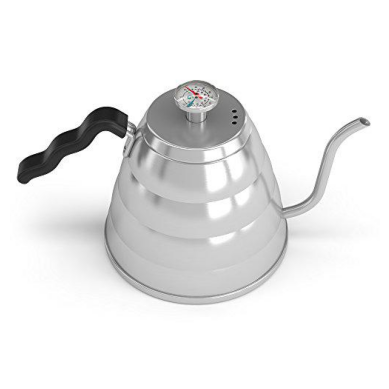

In [41]:
output_gpt4v = randomize_dict(output_gpt4v)
for img, val in output_gpt4v.items():
    gpt4v_success_flag = val['true_class'] == val['predicted_class']
    llava_success_flag = output_llava[img]['predicted_class'] is not None and output_llava[
        img]['true_class'] == output_llava[img]['predicted_class']
    if gpt4v_success_flag == SELECT_GPT4V_SUCCESS and llava_success_flag == SELECT_LLAVA_SUCCESS:
        print(f'img: {img}')
        print(f'Choices: {class_names}')
        print(f'gpt-4v output:\n{val}')
        print(f'llava output:\n{output_llava[img]}')
        show_img(f'../{RESULT_DIR}/random_1/{DATASET}/{img}')
        break